In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import seaborn as sns
import folium
from folium.features import GeoJsonTooltip
import matplotlib.pyplot as plt


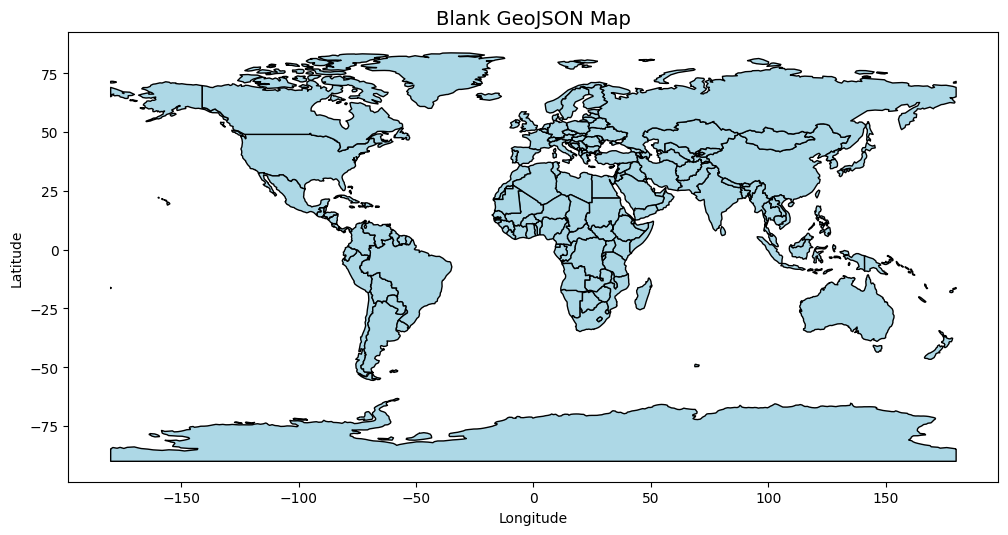

In [2]:
# Load local GeoJSON file
geojson_df = gpd.read_file("custom.geo.json")  # Ensure the file is in the correct directory

# Plot the map
fig, ax = plt.subplots(figsize=(12, 6))
geojson_df.plot(ax=ax, color="lightblue", edgecolor="black")

ax.set_title("Blank GeoJSON Map", fontsize=14)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Save the map as a PNG file
plt.savefig("geojson_map.png", dpi=300, bbox_inches="tight")  # Adjust the dpi as needed

# Show the map
plt.show()


In [3]:
# Get the updated unique country names from geojson_df
unique_countries = geojson_df["name"].unique()
geo_sorted_countries = sorted(unique_countries)

# Print sorted country names from geojson_df
print("Total number of countries:", len(geo_sorted_countries))
print(geo_sorted_countries)


Total number of countries: 177
['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antarctica', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herz.', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Central African Rep.', 'Chad', 'Chile', 'China', 'Colombia', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', "Côte d'Ivoire", 'Dem. Rep. Congo', 'Denmark', 'Djibouti', 'Dominican Rep.', 'Ecuador', 'Egypt', 'El Salvador', 'Eq. Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Falkland Is.', 'Fiji', 'Finland', 'Fr. S. Antarctic Lands', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan',

In [4]:
# Load main_merged csv file
main_merged_df = pd.read_csv("main_merged.csv")

# Print # of unique countries and their names
unique_main_merged = main_merged_df["Country name"].unique()
print("Total number of countries:", len(unique_main_merged))
print(unique_main_merged)

Total number of countries: 135
['Afghanistan' 'Albania' 'Algeria' 'Argentina' 'Armenia' 'Australia'
 'Austria' 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Belarus' 'Belgium' 'Benin'
 'Bolivia' 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi'
 'Cambodia' 'Cameroon' 'Canada' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Costa Rica' 'Croatia' 'Cyprus' 'Denmark' 'Dominican Republic'
 'Ecuador' 'Egypt' 'El Salvador' 'Estonia' 'Ethiopia' 'Finland' 'France'
 'Gabon' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Guatemala' 'Guinea' 'Haiti'
 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq'
 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan'
 'Kenya' 'Kuwait' 'Kyrgyzstan' 'Laos' 'Latvia' 'Lebanon' 'Lesotho'
 'Liberia' 'Libya' 'Lithuania' 'Luxembourg' 'Madagascar' 'Malawi'
 'Malaysia' 'Maldives' 'Mali' 'Malta' 'Mauritania' 'Mauritius' 'Mexico'
 'Moldova' 'Mongolia' 'Montenegro' 'Morocco' 'Mozambique' 'Namibia'
 'Nepal' 'Netherlands' 'New Zealand' 'Nicaragua' 'Niger' 'Niger

In [5]:
# Convert lists directly into sets
geojson_set = set(geo_sorted_countries)  # Remove extra list brackets
main_merged_set = set(unique_main_merged)  # Remove extra list brackets

# Find different countries found in sorted_countries but not in unique_main_df and vice versa
geojson_diff = geojson_set - main_merged_set
main_merged_diff = main_merged_set - geojson_set

# Print the differences
print("Different Countries in geojson:", geojson_diff)
print("Different Countries in main_merged:", main_merged_diff)


Different Countries in geojson: {'N. Cyprus', 'Greenland', 'Palestine', 'Qatar', 'Cuba', 'Myanmar', 'South Korea', 'Antarctica', 'Kosovo', 'Djibouti', 'Somaliland', "Côte d'Ivoire", 'Eq. Guinea', 'Dominican Rep.', 'Bosnia and Herz.', 'Angola', 'Sudan', 'United States of America', 'Congo', 'W. Sahara', 'New Caledonia', 'Dem. Rep. Congo', 'Taiwan', 'Trinidad and Tobago', 'Timor-Leste', 'Fiji', 'Belize', 'North Korea', 'Central African Rep.', 'Oman', 'Guinea-Bissau', 'Somalia', 'Bhutan', 'Czechia', 'Papua New Guinea', 'eSwatini', 'Guyana', 'Puerto Rico', 'Suriname', 'Falkland Is.', 'S. Sudan', 'Eritrea', 'Syria', 'Bahamas', 'Solomon Is.', 'Vanuatu', 'Fr. S. Antarctic Lands', 'Gambia', 'Brunei', 'North Macedonia'}
Different Countries in main_merged: {'Malta', 'Bahrain', 'Mauritius', 'Singapore', 'Comoros', 'United States', 'Maldives', 'Dominican Republic'}


In [6]:
# Rename "United States of America" to "United States" in the "name" column of geojson_df
geojson_df['name'] = geojson_df['name'].replace({"United States of America": "United States"})

# List of countries to exclude
exclude_countries = ['Mauritius', 'Malta', 'Comoros', 'Serbia', 'Tanzania', 
                     'Singapore', 'Maldives', 'Bahrain']

# Filter out countries from main_merged_df's "Country name" column
filtered_countries = [country for country in main_merged_df["Country name"] if country not in exclude_countries]

# Filter geojson_df based on filtered countries list
geojson_df_filtered = geojson_df[geojson_df['name'].isin(filtered_countries)]

# Print the total # of filtered countries in geojson_df
print("Total number of countries in filtered geojson_df:", len(geojson_df_filtered))

# Print filtered countries
print(geojson_df_filtered["name"].unique())


Total number of countries in filtered geojson_df: 126
['Costa Rica' 'Nicaragua' 'Haiti' 'El Salvador' 'Guatemala' 'Honduras'
 'United States' 'Canada' 'Mexico' 'Panama' 'Jamaica' 'Indonesia'
 'Malaysia' 'Cyprus' 'India' 'China' 'Israel' 'Lebanon' 'Uzbekistan'
 'Kazakhstan' 'Tajikistan' 'Mongolia' 'Vietnam' 'Cambodia'
 'United Arab Emirates' 'Georgia' 'Azerbaijan' 'Turkey' 'Laos'
 'Kyrgyzstan' 'Armenia' 'Iraq' 'Iran' 'Saudi Arabia' 'Pakistan' 'Thailand'
 'Kuwait' 'Bangladesh' 'Afghanistan' 'Turkmenistan' 'Jordan' 'Nepal'
 'Yemen' 'Philippines' 'Sri Lanka' 'Japan' 'Chile' 'Bolivia' 'Peru'
 'Argentina' 'Brazil' 'Uruguay' 'Ecuador' 'Colombia' 'Paraguay'
 'Venezuela' 'Ethiopia' 'Kenya' 'Malawi' 'Morocco' 'Namibia'
 'South Africa' 'Libya' 'Tunisia' 'Zambia' 'Sierra Leone' 'Guinea'
 'Liberia' 'Mali' 'Senegal' 'Nigeria' 'Benin' 'Botswana' 'Zimbabwe' 'Chad'
 'Algeria' 'Mozambique' 'Burundi' 'Rwanda' 'Uganda' 'Lesotho' 'Cameroon'
 'Gabon' 'Niger' 'Burkina Faso' 'Togo' 'Ghana' 'Egypt' 'Mauritania

In [7]:
# Merge filtered gep.json file with main_merged_df using "Regional indicator"
final_merge_gdf = geojson_df_filtered.merge(main_merged_df[["Country name", "Regional indicator"]],  
                                             left_on="name", right_on="Country name", how="left")

# Check column names of final merge
print(final_merge_gdf.columns)

Index(['featurecla', 'scalerank', 'labelrank', 'sovereignt', 'sov_a3',
       'adm0_dif', 'level', 'type', 'tlc', 'admin',
       ...
       'fclass_gr', 'fclass_it', 'fclass_nl', 'fclass_se', 'fclass_bd',
       'fclass_ua', 'filename', 'geometry', 'Country name',
       'Regional indicator'],
      dtype='object', length=172)


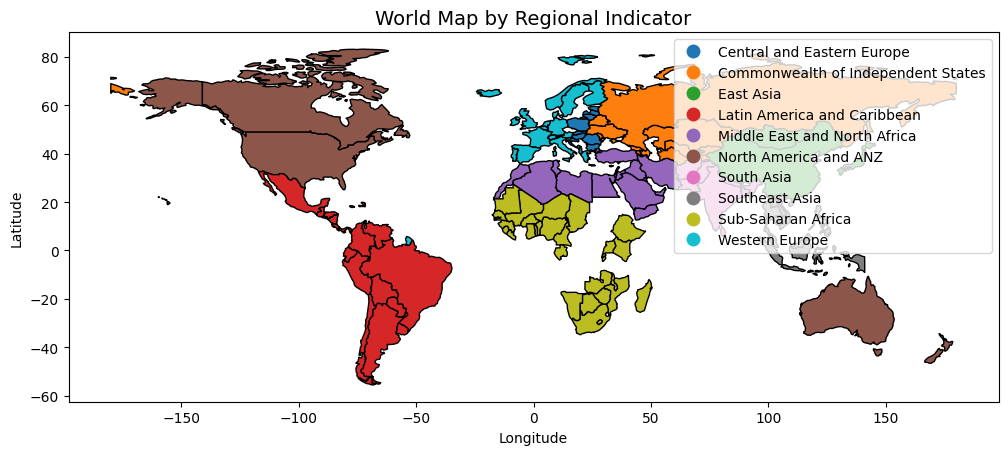

In [8]:
# Plot the world map colored by regional indicator
fig, ax = plt.subplots(figsize=(12, 6))
final_merge_gdf.plot(column="Regional indicator", cmap="tab10", legend=True, edgecolor="black", ax=ax)

# Customize appearance
ax.set_title("World Map by Regional Indicator", fontsize=14)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the map
plt.show()

# Add Folium map to display interactive map (Optional)
# Create a folium map centered around the world
m = folium.Map(location=[0, 0], zoom_start=2)

# Add GeoJSON layer with tooltip
folium.GeoJson(
    final_merge_gdf,
    tooltip=GeoJsonTooltip(fields=['name', 'Regional indicator'], aliases=['Country:', 'Region:'])
).add_to(m)

# Save the map as an HTML file
m.save("interactive_map.html")


In [9]:
# **Folium Interactive Map - Group by Region**
m = folium.Map(location=[20, 0], zoom_start=2, tiles="cartodb positron")

# Generate a color palette for unique regions
regions = final_merge_gdf["Regional indicator"].dropna().unique()
palette = sns.color_palette("tab10", len(regions)).as_hex()  # Convert colors to HEX
region_colors = dict(zip(regions, palette))  # Map each region to a color

# Define tooltip information (shown on hover)
tooltip = GeoJsonTooltip(
    fields=["name", "Regional indicator"],
    aliases=["Country:", "Region:"],
    localize=True,
    sticky=False,
    labels=True,
    style="background-color: white; color: black; font-family: Arial; font-size: 12px; padding: 5px;"
)

# Add GeoJSON layer with dynamic colors based on "Regional indicator"
folium.GeoJson(
    final_merge_gdf,
    name="World Map by Region",
    tooltip=tooltip,
    style_function=lambda feature: {
        "fillColor": region_colors.get(feature["properties"].get("Regional indicator"), "gray"),  
        "color": "black",
        "weight": 1,
        "fillOpacity": 0.7
    }
).add_to(m)

# ✅ **Add a Layer Control** (Optional, to toggle the layer visibility)
folium.LayerControl().add_to(m)

# ✅ **Save and Display the Interactive Map**
m.save("interactive_map.html")  # Saves as an interactive HTML file
m  # Shows the map in Jupyter Notebook (if running in a notebook)


In [10]:
# Group by "Regional indicator" and calculate the mean of "Ladder score"
regional_ladder = main_merged_df.groupby("Regional indicator")["Ladder score"].mean()

# Display the first few rows of "Ladder score" by "Regional indicator"
regional_ladder


Regional indicator
Central and Eastern Europe            5.960769
Commonwealth of Independent States    5.467000
East Asia                             5.652000
Latin America and Caribbean           5.908050
Middle East and North Africa          5.263687
North America and ANZ                 7.128500
South Asia                            4.441857
Southeast Asia                        5.530250
Sub-Saharan Africa                    4.431063
Western Europe                        6.983850
Name: Ladder score, dtype: float64

In [11]:
# # Group by "Regional indicator" and calculate the mean of "Health Care to Life Expectancy Ratio"
regional_hc_life_ratio = (main_merged_df.groupby("Regional indicator")["Health Care to Life Expectancy Ratio"].mean())

regional_hc_life_ratio

Regional indicator
Central and Eastern Europe            0.862470
Commonwealth of Independent States    0.862083
East Asia                             0.957841
Latin America and Caribbean           0.866264
Middle East and North Africa          0.852938
North America and ANZ                 0.963708
South Asia                            0.830414
Southeast Asia                        0.936937
Sub-Saharan Africa                    0.855212
Western Europe                        0.961662
Name: Health Care to Life Expectancy Ratio, dtype: float64

In [12]:
# Group by "Regional indicator" and calculate the mean of "value" (aka Population)
regional_population = main_merged_df.groupby("Regional indicator")["value"].sum()

# Display the first few rows of "Ladder score" by "Regional indicator"
regional_population

Regional indicator
Central and Eastern Europe            1.042753e+08
Commonwealth of Independent States    2.877379e+08
East Asia                             1.525784e+09
Latin America and Caribbean           6.322077e+08
Middle East and North Africa          5.179823e+08
North America and ANZ                 4.037430e+08
South Asia                            1.832936e+09
Southeast Asia                        6.224748e+08
Sub-Saharan Africa                    9.084513e+08
Western Europe                        4.272224e+08
Name: value, dtype: float64

In [13]:
from branca.colormap import linear

# Merge the regional_ladder, regional_hc_life_ratio, and regional_population data
region_info = pd.DataFrame({
    'Regional indicator': regional_ladder.index,
    'Ladder score': regional_ladder.values,
    'Health Care to Life Expectancy Ratio': regional_hc_life_ratio.values,
    'value' : regional_population.values
})

# Convert to dictionary for easy lookup
region_info_dict = region_info.set_index('Regional indicator').to_dict(orient="index")

# Initialize the Folium map
m = folium.Map(location=[20, 0], zoom_start=2, tiles="cartodb positron")

# Generate the color palette for intensity levels based on "Ladder score"
# Create a linear color scale (for intensity)
intensity_scale = linear.YlOrRd_09.scale(min(regional_ladder), max(regional_ladder))

# Function to get the tooltip information with ladder score and health care to life expectancy ratio
def get_tooltip(feature):
    region = feature["properties"]["Regional indicator"]
    if region in region_info_dict:
        ladder_score = region_info_dict[region]["Ladder score"]
        hc_life_ratio = region_info_dict[region]["Health Care to Life Expectancy Ratio"]
        tooltip_text = f"<b>Region:</b> {region}<br>" \
                       f"<b>Ladder Score:</b> {ladder_score:.2f}<br>" \
                       f"<b>Health Care to Life Expectancy Ratio:</b> {hc_life_ratio:.2f}"
        return tooltip_text
    return "<b>Region:</b> Unknown"

# Add GeoJSON layer with dynamic colors based on "Ladder score" (intensity levels)
folium.GeoJson(
    final_merge_gdf,
    name="World Map by Intensity",
    tooltip=GeoJsonTooltip(
        fields=["name", "Regional indicator"],
        aliases=["Country:", "Region:"],
        localize=True,
        sticky=False,
        labels=True,
        style="background-color: white; color: black; font-family: Arial; font-size: 12px; padding: 5px;"
    ),
    style_function=lambda feature: {
        "fillColor": intensity_scale(region_info_dict.get(feature["properties"]["Regional indicator"], {}).get("Ladder score", 0)),
        "color": "black",
        "weight": 1,
        "fillOpacity": 0.7
    },
    popup=folium.Popup(get_tooltip, max_width=300)  # Add custom tooltip with ladder score and health care ratio
).add_to(m)

# Add color scale (legend) to the map
intensity_scale.add_to(m)

# ✅ **Add a Layer Control** (Optional, to toggle the layer visibility)
folium.LayerControl().add_to(m)

# ✅ **Save and Display the Interactive Map**
m.save("interactive_map_with_intensity_levels.html")  # Saves as an interactive HTML file
m  # Shows the map in Jupyter Notebook (if running in a notebook)


In [14]:
# Convert to dictionary for easy lookup
region_info_dict = region_info.set_index('Regional indicator').to_dict(orient="index")

# Initialize the Folium map
m = folium.Map(location=[20, 0], zoom_start=2, tiles="cartodb positron")

# Generate the color palette for intensity levels based on regional_hc_life_ratio data
# Create a linear color scale (for intensity)
intensity_scale = linear.YlOrRd_09.scale(min(regional_ladder), max(regional_hc_life_ratio.values))

# Function to get the tooltip information with ladder score and health care to life expectancy ratio
def get_tooltip(feature):
    region = feature["properties"]["Regional indicator"]
    if region in region_info_dict:
        ladder_score = region_info_dict[region]["Ladder score"]
        hc_life_ratio = region_info_dict[region]["Health Care to Life Expectancy Ratio"]
        tooltip_text = f"<b>Region:</b> {region}<br>" \
                       f"<b>Ladder Score:</b> {ladder_score:.2f}<br>" \
                       f"<b>Health Care to Life Expectancy Ratio:</b> {hc_life_ratio:.2f}"
        return tooltip_text
    return "<b>Region:</b> Unknown"

# Add GeoJSON layer with dynamic colors based on "Ladder score" (intensity levels)
folium.GeoJson(
    final_merge_gdf,
    name="World Map by Intensity",
    tooltip=GeoJsonTooltip(
        fields=["name", "Regional indicator"],
        aliases=["Country:", "Region:"],
        localize=True,
        sticky=False,
        labels=True,
        style="background-color: white; color: black; font-family: Arial; font-size: 12px; padding: 5px;"
    ),
    style_function=lambda feature: {
        "fillColor": intensity_scale(region_info_dict.get(feature["properties"]["Regional indicator"], {}).get("Ladder score", 0)),
        "color": "black",
        "weight": 1,
        "fillOpacity": 0.7
    },
    popup=folium.Popup(get_tooltip, max_width=300)  # Add custom tooltip with ladder score and health care ratio
).add_to(m)

# Add color scale (legend) to the map
intensity_scale.add_to(m)

# ✅ **Add a Layer Control** (Optional, to toggle the layer visibility)
folium.LayerControl().add_to(m)

# ✅ **Save and Display the Interactive Map**
m.save("interactive_map_with_intensity_levels.html")  # Saves as an interactive HTML file
m  # Shows the map in Jupyter Notebook (if running in a notebook)


In [15]:
# Merge data into a single DataFrame
region_info = pd.DataFrame({
    'Regional indicator': regional_population.index,
    'Population': regional_population.values,
    'Ladder score': regional_ladder.values,
    'Health Care to Life Expectancy Ratio': regional_hc_life_ratio.values
})

# Convert to dictionary for easy lookup
region_info_dict = region_info.set_index('Regional indicator').to_dict(orient="index")

# Initialize the Folium map
m = folium.Map(location=[20, 0], zoom_start=2, tiles="cartodb positron")

# Generate the color palette for intensity levels based on regional population
intensity_scale = linear.YlOrRd_09.scale(min(regional_population), max(regional_population))

# Function to get the tooltip information with population, ladder score, and health care ratio
def get_tooltip(feature):
    region = feature["properties"]["Regional indicator"]
    if region in region_info_dict:
        population = region_info_dict[region]["Population"]
        ladder_score = region_info_dict[region]["Ladder score"]
        hc_life_ratio = region_info_dict[region]["Health Care to Life Expectancy Ratio"]
        tooltip_text = f"<b>Region:</b> {region}<br>" \
                       f"<b>Population:</b> {population:,}<br>" \
                       f"<b>Ladder Score:</b> {ladder_score:.2f}<br>" \
                       f"<b>Health Care to Life Expectancy Ratio:</b> {hc_life_ratio:.2f}"
        return tooltip_text
    return "<b>Region:</b> Unknown"

# Add GeoJSON layer with dynamic colors based on "regional population"
folium.GeoJson(
    final_merge_gdf,
    name="World Map by Population Intensity",
    tooltip=GeoJsonTooltip(
        fields=["name", "Regional indicator"],
        aliases=["Country:", "Region:"],
        localize=True,
        sticky=False,
        labels=True,
        style="background-color: white; color: black; font-family: Arial; font-size: 12px; padding: 5px;"
    ),
    style_function=lambda feature: {
        "fillColor": intensity_scale(region_info_dict.get(feature["properties"]["Regional indicator"], {}).get("Population", 0)),
        "color": "black",
        "weight": 1,
        "fillOpacity": 0.7
    },
    popup=folium.Popup(get_tooltip, max_width=300)  # Add custom tooltip with region details
).add_to(m)

# Add color scale (legend) to the map
intensity_scale.caption = "Regional Population Intensity"
intensity_scale.add_to(m)

# ✅ **Add a Layer Control** (Optional, to toggle the layer visibility)
folium.LayerControl().add_to(m)

# ✅ **Save and Display the Interactive Map**
m.save("interactive_map_with_population_intensity.html")  # Saves as an interactive HTML file
m  # Shows the map in Jupyter Notebook (if running in a notebook)
